
Model metrics:
    slope_a  intercept_b       R2      MSE       data_source
100.540417  -100.971685 0.999502 0.058812 embedded_fallback

Predictions:
  height_m  predicted_weight_kg
     1.55                54.87
     1.62                61.90
     1.70                69.95
     1.80                80.00


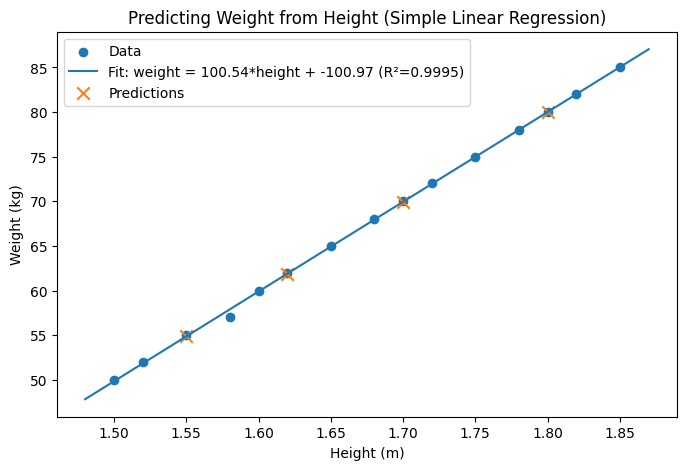

('/mnt/data\\req13_height_weight_regression.png',
 '/mnt/data\\req13_predictions.csv',
 np.float64(100.54041711067141),
 np.float64(-100.97168518800443),
 0.9995020468238561,
 0.05881158979043054,
 'embedded_fallback')

In [1]:
# === REQUIREMENT 13 — ONE-CELL, SELF-CONTAINED (JUPYTER) ===
# Task: Using height–weight data, fit a regression to predict WEIGHT (kg) from HEIGHT (m).
# What this cell does:
#   1) Load dataset from /mnt/data/height_weight.csv if present (columns: height_m, weight_kg);
#      otherwise use an embedded fallback dataset (editable below).
#   2) Fit SIMPLE LINEAR REGRESSION (degree=1) via NumPy (no sklearn needed).
#   3) Show model metrics (slope/intercept, R², MSE).
#   4) Predict weight for selected heights (edit HEIGHTS_TO_PREDICT).
#   5) Plot ONE chart (scatter + fitted line) and save figure + predictions CSV for your report.

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 0) Try loading external CSV; else use fallback ----------
data_path = "/mnt/data/height_weight.csv"
use_source = ""

if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    # Minimal validation
    if not {"height_m", "weight_kg"}.issubset(df.columns):
        raise ValueError("CSV must contain columns: height_m, weight_kg")
    df = df[["height_m", "weight_kg"]].dropna()
    use_source = "loaded_from_csv"
else:
    # EDIT this fallback dataset if you have the exact values from [1] p.101
    heights_m = np.array([1.50, 1.52, 1.55, 1.58, 1.60, 1.62, 1.65, 1.68, 1.70, 1.72, 1.75, 1.78, 1.80, 1.82, 1.85], dtype=float)
    weights_kg = np.array([50.0, 52.0, 55.0, 57.0, 60.0, 62.0, 65.0, 68.0, 70.0, 72.0, 75.0, 78.0, 80.0, 82.0, 85.0], dtype=float)
    df = pd.DataFrame({"height_m": heights_m, "weight_kg": weights_kg})
    use_source = "embedded_fallback"

# Heights to predict (EDIT as needed to match the assignment examples if specified)
HEIGHTS_TO_PREDICT = np.array([1.55, 1.62, 1.70, 1.80], dtype=float)

# ---------- 1) Prepare data ----------
x = df["height_m"].to_numpy(dtype=float)
y = df["weight_kg"].to_numpy(dtype=float)

# ---------- 2) Fit simple linear regression: y = a*x + b ----------
# (Ordinary least squares via np.polyfit with degree=1 — highest power first)
a, b = np.polyfit(x, y, deg=1)
y_hat = a * x + b

# Metrics
ss_res = float(np.sum((y - y_hat) ** 2))
ss_tot = float(np.sum((y - np.mean(y)) ** 2))
r2 = 1 - ss_res / ss_tot if ss_tot > 0 else 1.0
mse = float(np.mean((y - y_hat) ** 2))

# ---------- 3) Predict for requested heights ----------
predicted_weights = a * HEIGHTS_TO_PREDICT + b
pred_df = pd.DataFrame({
    "height_m": HEIGHTS_TO_PREDICT,
    "predicted_weight_kg": np.round(predicted_weights, 2)
}).sort_values("height_m").reset_index(drop=True)

# ---------- 4) Display tables ----------
metrics_df = pd.DataFrame([
    {"slope_a": round(a, 6), "intercept_b": round(b, 6), "R2": round(r2, 6), "MSE": round(mse, 6), "data_source": use_source}
])

try:
    from caas_jupyter_tools import display_dataframe_to_user
    display_dataframe_to_user("Requirement 13 - Model Metrics", metrics_df)
    display_dataframe_to_user("Requirement 13 - Predictions", pred_df)
except Exception:
    print("\nModel metrics:\n", metrics_df.to_string(index=False))
    print("\nPredictions:\n", pred_df.to_string(index=False))

# ---------- 5) Plot ONE chart (scatter + fitted line) ----------
x_line = np.linspace(min(x.min(), HEIGHTS_TO_PREDICT.min()) - 0.02,
                     max(x.max(), HEIGHTS_TO_PREDICT.max()) + 0.02, 200)
y_line = a * x_line + b

plt.figure(figsize=(8,5))
plt.scatter(x, y, label="Data")          # default colors only
plt.plot(x_line, y_line, label=f"Fit: weight = {a:.2f}*height + {b:.2f} (R²={r2:.4f})")
plt.scatter(HEIGHTS_TO_PREDICT, predicted_weights, marker="x", s=80, label="Predictions")

plt.title("Predicting Weight from Height (Simple Linear Regression)")
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.legend()

# ---------- 6) Save artifacts ----------
save_dir = "/mnt/data"
os.makedirs(save_dir, exist_ok=True)
fig_path = os.path.join(save_dir, "req13_height_weight_regression.png")
pred_csv_path = os.path.join(save_dir, "req13_predictions.csv")
plt.savefig(fig_path, bbox_inches="tight")
plt.show()
pred_df.to_csv(pred_csv_path, index=False)

(fig_path, pred_csv_path, a, b, r2, mse, use_source)
